# TOPIC 8: Objectgericht Programmeren - Deel 1: Objecten Gebruiken 
---------

Eigenlijk kunnen we zeggen dat al het programmeerwerk dat we tot nu toe
gedaan hebben quasi steeds neerkomt op het schrijven van Python functies
(die we soms ook wel procedures genoemd hebben) die dan toegepast worden op een aantal
Python waarden. Daarom noemt men deze stijl van programmeren ook wel
*procedureel programmeren*. We zouden ook *functioneel
    programmeren* kunnen zeggen maar in de computerwetenschappen heeft
    deze term echter een licht andere betekenis.

We hebben al vele voorbeelden gezien van het feit dat we Python kunnen
uitbreiden met nieuwe functies dank zij `def`. In dit topic zullen we
zien dat men Python ook kan uitbreiden met nieuwe types (en dus met
nieuwe soorten waarden). In Python is dit mogelijk dank zij een
programmeerstijl die men *object-gericht programmeren* noemt.

In de computerwetenschappen bestaan er talloze programmeertalen en elke
taal is ontworpen met een bepaalde programmeerstijl in het achterhoofd.
Sommige zijn zuivere procedurele programmeertalen (bvb. Pascal, C,
\...). Andere zijn zuivere object-gerichte programmeertalen (bvb.
Smalltalk). De meeste zijn echter "bastaard" programmeertalen die de
kracht van beide stijlen op de één of andere manier combineren. Men
noemt ze soms *multi-paradigm* programmeertalen. De verzameling van alle programmeertalen die een bepaalde
    programmeerstijl aanhangen noemt men een programmerparadigma. In
    natuurlijke talen worden talen opgedeeld in families zoals bvb.
    romaanse talen en germaanse talen. Men zou de verschillende
    programmeerparadigma's kunnen vergelijken met zulke families van
    talen.
    
Python is zo'n
multi-paradigm programmeertaal. Zoals we zullen zien leven de concepten
uit procedureel programmeren (die we tot nu toe hebben gebruikt)
harmonieus samen met de concepten uit objectgericht programmeren. Dit
wordt bewerkstelligd door de procedurele syntax een nieuwe onderliggende
objectgerichte betekenis te geven. De syntax die we tot nu toe gezien
hebben wordt op deze manier een laag van procedurele *syntactische
suiker* bovenop de eigenlijke objectgerichte kern van de taal.

In Python kan men dus procedureel programmeren m.b.v. procedurele
syntax. Dat is wat we tot nu toe gedaan hebben. Onder de motorkap werkt
Python echter op de objectgerichte manier. De read-fase van de
read-eval-print-loop zorgt ervoor dat het vuile werk van de nodige
omzettingen automatisch gedaan wordt. Vanaf nu leren we ook de
objectgerichte syntax. Zoals we zullen zien zal dit ons toelaten van
Python gevoelig krachtiger te maken door haar uit te breiden met nieuwe
soorten waarden (m.a.w. met nieuwe types). In deze topic zullen we bvb.
uitbreidingen van Python bestuderen waarmee we krachtige wiskundige
berekeningen kunnen maken en waarmee we eenvoudig 3-dimensionale
grafische programma's kunnen schrijven.

Functies vormen het werkpaard van procedureel programmeren. In
objectgericht programmeren wordt deze rol overgenomen door *objecten*.
Indien we even terug reflecteren, zien we dat er twee aspecten zijn aan
het leren werken met Python functies. Men moet zelf functies leren
schrijven en men moet functies (geschreven door jezelf of door anderen)
leren oproepen. Dat is net zo met objecten: men moet Python kunnen
uitbreiden met nieuwe soorten objecten en men moet met bestaande en nieuwe
soorten objecten kunnen werken. Net zoals we bij functies vertrokken
zijn van het gebruik van bestaande functies (die ingebouwd zijn of door
anderen geschreven werden) zullen we bij objectgericht programmeren dan
ook vertrekken van het *gebruik* van bestaande objecten. Het leren maken
van nieuwe soorten objecten is voer voor topic 9.

## Objecten
--------

In de terminologie die we tot nu toe ontwikkeld hebben spraken we van
*waarden*, *types*, *variabelen* en *functies*. Dat is de terminologie
die doorgaans gehanteerd wordt in procedurele programmeertalen. Vanaf nu
zullen we het ook hebben over *objecten*, *klassen*, *attributen* en
*methoden* wat de terminologie van object-gerichte programmeertalen is.
De volgende tabel geeft een overzicht van het verband tussen beide
gebruiken:


|procedurele terminologie  |object-gerichte terminologie
| ------------------------ | ------------------------------
|  waarde                  |  object
| functie                  |  methode
|  variabele               | attribuut
| type                     | klasse

Een object kan men zich het best voorstellen als een "doosje" in het
computergeheugen. Dat doosje kan een "primitief" (zeg maar, atomair)
doosje zijn zonder enige interne structuur. Denk bijvoorbeeld aan een
geheel getal. Maar dat doosje kan ook zeer rijk aan interne structuur
zijn. Denk bijvoorbeeld aan een matrix in de wiskunde die uit rijen en
kolommen van getallen bestaat.

### Voorbeeld 1: Complexe Getallen

In objectgericht programmeren bestaat *ieder* object uit een aantal
attributen en methoden. De attributen zijn variabelen die de onderdelen
van het object omvatten. De methoden zijn de functies die toepasbaar
zijn op het object waarin ze omvat zitten. Zowel de attributen als de de
methoden worden "vast gepakt" m.b.v. de syntax met een punt. Hieronder volgt een interactie met de REPL in de
objectgerichte stijl:

In [1]:
cpx = 1+2j

In [2]:
cpx.imag

2.0

In [3]:
cpx.conjugate()

(1-2j)

In [4]:
cpx.imag = 4

AttributeError: readonly attribute

We beginnen met een (gewone) variabele `cpx` te definiëren die
geassocieerd wordt met een complex getal $1+2i$. In de nieuwe
terminologie is dit complex getal een object dat 2 attributen heeft. Het
attribuut `real` bevat het reële gedeelte en het attribuut `imag` bevat
het imaginaire gedeelte. De syntax met het puntje laat zien hoe we die
attributen uit het object kunnen uitlezen. Het object bevat ook
(minstens) een methode `conjugate`. Dit is een functie die in dat object
"leeft" en die we kunnen oproepen door de naam van de functie te laten
voorafgaan door het object en een puntje. Het voorbeeld laat ook zien
dat het in dit geval onmogelijk is om de attributen te veranderen: de
foutmelding zegt dat het attribuut `imag` "read only" is. Een
complex getal een primitief (t.t.z. ingebouwd) object, we kunnen de
interne structuur niet veranderen. 

### Voorbeeld 2: Lijsten

Niet alleen complexe getallen zijn objecten die boordevol nuttige
attributen en methoden zitten. In het volgende voorbeeld bestuderen we
lijsten en strings in het licht van onze nieuwe terminologie.

We starten met een variabele `colors` te definiëren die een lijst van
strings bevat. We beginnen met
het illustreren van enkele methoden die de lijst uitbreiden en
inkrimpen. `append` is een methode die een argument toevoegt achteraan
de lijst. `insert` neemt twee argumenten: een positie en een element.
Deze methode zal het nieuwe element toevoegen op de meegegeven positie.
`remove` ten slotte neemt een element als argument en zal het
verwijderen uit de lijst. Je merkt dat de lijst telkens ook echt veranderd is.

In [5]:
colors= ['red', 'orange', 'green', 'black', 'blue']

In [6]:
colors.append('purple')

In [7]:
colors

['red', 'orange', 'green', 'black', 'blue', 'purple']

In [8]:
colors.insert(2,'yellow')

In [9]:
colors

['red', 'orange', 'yellow', 'green', 'black', 'blue', 'purple']

In [10]:
colors.remove('black')

In [11]:
colors

['red', 'orange', 'yellow', 'green', 'blue', 'purple']

Naast de methoden om lijsten op te bouwen en af te breken zijn er een
pak methoden voorhanden die lijsten manipuleren. `reverse` draait de
volgorde van de elementen van de lijst om en `sort` sorteert de
elementen van klein naar groot. Voor strings betekent dit dat de lexicografische volgorde gebruikt wordt. Dit is de volgorde die door lexicografen (t.t.z. woordenboekmakers) wordt gebruikt. Als we ons voorbeeld met getallen hadden uitgewerkt wordt de mormale orderelatie op getallen gebruikt.

In [12]:
colors.reverse()

In [13]:
colors

['purple', 'blue', 'green', 'yellow', 'orange', 'red']

In [14]:
colors.sort()

In [15]:
colors

['blue', 'green', 'orange', 'purple', 'red', 'yellow']

Merk op dat vele van de methoden op lijsten eigenlijk procedures zijn en
geen functies. Ze geven geen nuttig resultaat terug (ze geven gewoon `None` terug) maar
veranderen de lijst waarop ze opgeroepen worden. Als je dat niet goed begrijpt sta je soms voor verrassingen. Kijk naar het voorbeeld hieronder. 

In [16]:
colors= ['red', 'orange', 'green', 'black', 'blue']

In [17]:
sorted_colors = colors.sort()

In [18]:
sorted_colors

In [19]:
colors

['black', 'blue', 'green', 'orange', 'red']

De auteur van dit stukje code verwachtte waarschijnlijk dat de variabele `sorted_colors` nu de gesorteerde lijst zou zijn. Maar`sorted_colors` is een variabele die de terugkeerwaarde van de methode `sort` opvangt. Het bekijken van de waarde van deze variabele levert
niets op in de REPL omdat de `sort` methode de waarde
`None` heeft teruggegeven. Het is de oorspronkelijke lijst die werd gesorteerd.

### Opmerkingen

In de nieuwe terminologie noemen we het type van een object ook wel de
klasse waartoe het object behoort. In topic 9
zullen we zien
dat we *nieuwe* klassen aan Python kunnen toevoegen; nieuwe soorten
objecten dus. Hiermee kunnen we de verzameling Python waarden
spreekwoordelijk oneindig groot maken.

Merk ten slotte op dat er een subtiel verschil is tussen het gebruik van
de punt bij modules (zie introductie van modules in Topic 2) en
het gebruik van de punt om attributen en methoden van objecten aan te
duiden. Een module is een file die (slechts 1 keer) ingeladen wordt. Men
kan geen 2 "kopies" van een module in het geheugen hebben. Dat is niet
zo voor objecten: ieder object is uniek. Gebruik van "." voor een
bepaalde lijst zal geen effect hebben op alle andere lijsten in je
computergeheugen. Dat zien we hieronder:

In [20]:
lst1 = [3,2,1]

In [21]:
lst2 = [3,2,1]

In [22]:
lst1.sort()

In [23]:
lst1

[1, 2, 3]

In [24]:
lst2

[3, 2, 1]

Het voorbeeld definieert twee gelijkaardige lijsten. Daarna wordt de
`sort` methode opgeroepen op de eerste lijst en zien we dat die lijst
ook daadwerkelijk gesorteerd is. Nazicht van de tweede lijst bewijst dat
die nog steeds ongesorteerd is. Beide lijsten zijn dus afzonderlijke
objecten in het computergeheugen, elk met hun eigen attributen en
methoden. Diep binnenin is Python wel slim genoeg om de methoden van gelijkaardige objecten met mekaar te delen zodat niet ieder object computergeheugen dient te verspillen voor methoden die toch gelijk zijn. Als programmeur dien je dit echter niet te weten.

### De Inhoud van een Object: `dir`

Een object bevat dus attributen en methoden. We kunnen op eenvoudige
wijze achterhalen welke attributen en methoden een object bevat m.b.v.
de `dir` functie. Die zien we hier aan het werk voor complexe getallen:

In [25]:
dir(1+1j)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'conjugate',
 'imag',
 'real']

Toepassing van `dir` op een (willekeurig) complex getal levert een lange lijst van
strings op. Dit zijn de namen van de attributen en methoden die in het
getal vervat zijn. Merk op dat de meesten hiervan beginnen en eindigen met
underscores. Dit is een conventie die door de makers van Python gebruikt
wordt om aan te geven dat deze eigenlijk nooit door gebruikers van het
object (wij dus) rechtstreeks gebruikt zouden mogen worden. Zo is
`__delattr__` weliswaar een methode van het complex getal maar is die
enkel bedoeld voor "intern gebruik". Dat wil zeggen dat de andere
methoden (zoals bvb. `conjugate`) deze misschien oproepen maar dat het
niet de bedoeling is dat wij die "van buitenaf" gaan oproepen. In een
volgende versie van Python kunnen de makers `__delattr__` misschien
zelfs verwijderen uit complexe getallen. Indien we de conventie volgen
zal onze code daardoor nooit aangetast worden. In het jargon van
object-georienteeerd programmeren spreekt men van *publieke* en
*private* attributen en methoden. `conjugate` is dus een publieke
methode. Deze mag opgeroepen worden door ons en door de andere methoden
van het object. `__delattr__` is een private methode. Deze zou enkel
opgeroepen mogen worden door de andere methoden van het object.

Op dit ogenblik ziet het ernaar uit dat complexe getallen enkel
`conjugate`, `imag` en `real` ondersteunen en dat alle andere methoden
privaat zijn. Dat is inderdaad het geval. Het wordt verklaard door de
volgende sectie.

### Syntactische Suiker

Het precieze verband tussen procedureel programmeren en objectgericht
programmeren in Python wordt gelegd door het begrip *syntactische
suiker*. Bij het bakken van een taart kan men stellen dat het biscuit de
structuur van de taart vormt terwijl de buitenste suikerlaag van de
taart enkel en alleen dient om de taart wat mooier en smakelijker te
maken. Dat is net zo bij programmeertalen: sommige concepten van een
programmeertaal vormen de structurele kern van de programmeertaal
terwijl andere slechts een syntactisch laagje vormen die ons toelaten om
dingen wat mooier op te schrijven maar die eigenlijk het onderliggende
gebruik van de kernconcepten wegstopt. Syntactische suiker voegt dus
niks wezenlijks toe aan een programmeertaal maar maakt de taal wel
makkelijker hanteerbaar voor programmeurs.

Tot hiertoe hebben we in Python operatoren als `*` "gewoon" zoals in de
wiskunde gebruikt. Zulke operatoren zijn eigenlijk mooie syntactische
voorstellingen voor onderliggende methode-oproepen. De read-fase doet
het vuile werk om de `*` syntax om te zetten naar de werkelijke
methode-oproepen. In het geval van `*` is dat de private `__mul__`
methode die in getal-objecten zit. Hieronder zien we dat we deze methode ook
"met de hand" kunnen oproepen. Herinner dat het echter niet de bedoeling
is dat we methoden met underscores rechtstreeks gaan oproepen.

In [26]:
three = 3

In [27]:
three * 10

30

In [28]:
three.__mul__(10)

30

De meeste van de private methoden van allerlei soorten getallen worden op deze
manier opgeroepen door Python. Operatoren in Python (zoals `+`, `-`, \...) zijn dus
eigenlijk niet essentieel aan Python. Ze vormen een laagje syntactische
suiker bovenop de objectgerichte kern van de taal. Indien de makers van
Python zouden beslissen operatoren te verwijderen, dan zouden we nog
steeds alle Python programma's kunnen schrijven. Het zou gewoon wat
omslachtiger (en lelijker!) zijn doordat we overal met de hand de
methodes met de underscores zouden moeten oproepen.

In een volgend topic zullen we zien hoe we zélf nieuwe klassen
(t.t.z. types) kunnen bouwen door er attributen en methoden in te
definiëren. Het werken met syntactische suiker  heeft als grote voordeel dat we
automatisch de `*` kunnen gebruiken voor elk soort object waarvoor we
een methode met naam `__mul__` schrijven. We zouden bijvoorbeeld een
klasse `matrix` kunnen maken om matrices voor te stellen en deze
techniek gebruiken om op zeer natuurlijke wijze `A * B` te schrijven
indien `A` en `B` matrices zijn.

## Klassen en Constructoren
------------------------

In het geval van complexe getallen, lijsten en strings worden de
objecten automatisch "gemaakt" doordat we gewoon een complex getal, een
lijst of een string opschrijven. Dat is omdat de ontwerpers van Python hiervoor gekozen hebben. De read-fase van de REPL zal al het werk doen om wat jij intikt om the vormen naar een object.
Maar voor de nieuwe klassen
(t.t.z. types) die we zelf schrijven en voor een heleboel klassen die anderen voor ons al hebben geschreven, is dit niet het geval.  Zo'n object kunnen we niet "gewoon intikken" maar
moeten we "construeren" door specifieke functies op te roepen. Zulke functies die
nieuwe objecten in het computergeheugen maken noemt men *constructoren*.

### Voorbeeld 3: Breuken

Het volgende voorbeeld importeert de inhoud van de Python module
`fractions`. Daarna wordt twee keer een functie `Fraction`
opgeroepen, telkens met twee argumenten. `Fraction` is een constructor die een
nieuwe breuk maakt gegeven een teller en een noemer. De constructor doet
dit door een stukje computergeheugen te reserveren en hierin de dan de
teller en de noemer op te slaan voor later gebruik.

In [29]:
from fractions import *  

In [30]:
b1 = Fraction(1,2)

In [31]:
b2 = Fraction(1,4)

In [32]:
b1

Fraction(1, 2)

In [33]:
b2

Fraction(1, 4)

In [34]:
type(b1)

fractions.Fraction

In [35]:
b1.numerator

1

In [36]:
b1.denominator

2

In [37]:
b1 + b2

Fraction(3, 4)

In [38]:
b1.__add__(b2)

Fraction(3, 4)

De rest van het voorbeeld laat zien hoe we deze breuken kunnen
gebruiken. `type` laat zien dat de klasse `fractions.Fraction` (t.t.z.
de klasse `Fraction` die zich in de module `fractions` bevindt) het type
is van onze breuken.

Niet geheel onverwacht bevat iedere breuk twee attributen, namelijk de
teller en de noemer. Deze kunnen we uitlezen met de expressies
`b1.numerator` en `b1.denominator`. Je kan dank zij syntactische suiker twee breuken  optellen met de `+` operator (en het resultaat is opnieuw een breuk). Je kan ook de private methode `__add__` oproepen met een tweede breuk als argument. Dat levert ook de som op van
beide breuken. Herinner dat het niet de bedoeling is dat we dit ook
effectief doen, gebruik gewoon de `+`.

## Objectgericht Programmeren: Gevalstudies
----------------------------------------

We hebben nu alle concepten uitgelegd opdat we klassen en objecten
geschreven door derden kunnen importeren en gebruiken. Dit betekent dat
we nieuwe objecten kunnen maken en dat we met die objecten vannalles
kunnen doen door hun attributen op te vragen of door hun methoden op te
roepen. In de volgende topic leren we zélf nieuwe klassen te maken.

We vervolgen nu met 3 eenvoudige gevalstudies van objectgericht
programmeren: het gebruik van NumPy en SciPy in "scientific computing",
het gebruik van VPython voor "physical modeling" en het gebruik van
VPython in "theoretical biology" en "computational chemistry".

### Gevalstudie 1: Wetenschappelijk Rekenen in NumPy 

We beginnen met het gebruik van de module `NumPy`. `NumPy` is niet één module maar een *groep* modules die samen ondersteuning bieden voor wetenschappelijk rekenen.
Het bevat heel wat klassen die overeen komen met wiskundige begrippen en
vele methoden die allerlei numerieke technieken uit de wiskunde
verzorgen. `NumPy` is veel te groot om in het bestek van deze sectie
volledig uit de doeken te doen. We refereren dan ook naar het online
materiaal voor meer complete informatie.

Vele studenten zullen in hun loopbaan in contact komen met MatLab. Dit
is een commercieel (en overigens vrij duur) pakket dat gespecialiseerd
is in het manipuleren van matrices en andere wiskundige grootheden.
NumPy is een gratis Python bibliotheek die ontworpen is door een aantal
gebruikers van MatLab die de mogelijkheden van MatLab als te beperkt
ervoeren. NumPy is dus krachtiger dan MatLab aangezien het niet alleen
de objecten bevat die met de wiskundige concepten overeenkomen (zoals
bvb. matrices) maar bovendien met de hele kracht van Python gecombineerd
kan worden. In wat volgt bespreken we de mogelijkheden van NumPy die
dicht aanleunen bij de meest gebruikte functies uit MatLab. Voor een
verdere vergelijking tussen MatLab en NumPy verwijzen we naar online
materiaal (zie bvb. `http://wiki.scipy.org/NumPy_for_Matlab_Users`).

#### De klasse `array`

Onderstaande code laat meteen de oproep van de constructor `array` zien.
Deze neemt een tweedimensionale lijst (zie sectie over geneste lijsten in Topic 2)
en bouwt op basis hiervan een object van de
klasse `array` (met dezelfde naam dus). Deze klasse is het werkpaard van
`NumPy`. Het is de klasse van objecten die rechthoekige tabellen van
getallen voorstellen. De klasse is zodanig geprogrammeerd dat zulke
tabellen op uiterst efficiënte manier opgeslagen en verwerkt kunnen
worden.

In [39]:
from numpy import *

In [40]:
A = array([[1,5,2], [2,4,1], [3,6,2]])

In [41]:
B = array([[1,4,5], [2,5,5], [4,7,8]])

In [42]:
C = A - B

In [43]:
S = sin(A)

`A` en `B` worden hierbij dus gedefinieerd als variabelen die naar een
`array` verwijzen. De variabele `C` wordt gedefinieerd als het resultaat
van `A-B`. Intussen weten we dat dit dus eigenlijk overeenkomt met het
oproepen van de methode `__sub__` (Eng.: to subtract). Tenslotte zien de
we de variabele `S` die het resultaat van `sin(A)` bevat. Deze versie
van `sin` is dus toepasbaar op een hele `array` van waarden (in
tegenstelling tot de functie `sin` uit de `math` module). Hieronder zien
we de waarden van de 4 variabelen. Zoals verwacht zal `-` een nieuwe
tabel getallen maken door de elementen van `A` en `B` paarsgewijs van
mekaar af te trekken. `sin` zal een nieuwe tabel maken door de de sinus
te berekenen van alle elementen van haar argument.

In [44]:
A

array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

In [45]:
B

array([[1, 4, 5],
       [2, 5, 5],
       [4, 7, 8]])

In [46]:
C

array([[ 0,  1, -3],
       [ 0, -1, -4],
       [-1, -1, -6]])

In [47]:
S

array([[ 0.84147098, -0.95892427,  0.90929743],
       [ 0.90929743, -0.7568025 ,  0.84147098],
       [ 0.14112001, -0.2794155 ,  0.90929743]])

`NumPy` is zodanig ontworpen dat haar klassen en objecten uitstekend
samenwerken met de functies uit de module `matplotlib`. De `plot` functie bijvoorbeeld accepteert twee reeksen van waarden (de waarden op de x-as en de waarden op de y-as). In onze simpele voorbeelden in Topic 2 maakten we die gewoon met de hand.

In [48]:
from matplotlib.pyplot import *
plot((1,2,3,4,5),(1,4,9,16,25),"ro")
show()

<Figure size 640x480 with 1 Axes>

## Laten we terug
kijken naar de code in de sectie
over recursieve functies waar we in een gevalstudie over nulpunten berekenen een bifurcatiediagram hebben getekend. Onze eigenlijke bedoeling was om een aantal `float` waarden van $r$ af te lopen. We hebben dit echter indirect moeten doen door een
aantal `int` waarden af te lopen (d.m.v. `range`) en voor elke waarde
telkens de bijhorende waarde van $r$ te berekenen d.m.v. de formule
`r = r0 + (rf - r0) * float(pt)/(nrpoints - 1)`. 

`NumPy` voorziet de functie `arange`. Deze
neemt minstens twee argumenten (t.t.z. de beginwaarde en de eindwaarde)
en een optionele stapgrootte die uit `float` mag komen. Het resultaat is
een 1-dimensionale `array` van `float` waarden. `linspace` is een zeer
gelijkaardige functie. Hier is de derde parameter het aantal vereiste
punten i.p.v. de stapgrootte. Met `arange` en `linspace` kunen we reeksen van waarden maken die door  `plot` worden geaccepteerd.

Onderstaand voorbeeld illustreert dit. Merk op dat de blauwe plot veel gladder is dan de oranje. Daar is `arange` gebruikt met stapjes van `0.1` en zijn er dus meer dan 60 punten op de x-as gebruikt. Bij de oranje is `linspace` gebruikt en zijn er maar `10` punten op de x-as gebruikt.

In [1]:
from numpy import *
from matplotlib.pyplot import *

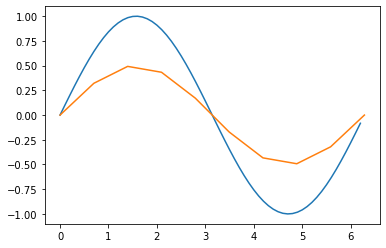

In [49]:
floats1  = arange( 0, 2*pi, 0.1)
floats2  = linspace(0, 2*pi, 10)
y1 = sin(floats1)
y2 = 0.5 * sin(floats2)
plot(floats1,y1)
plot(floats2,y2)
show()

#### De klasse `matrix`

In tegenstelling tot wat men op het eerste zicht zou vermoeden zijn de
objecten van de klasse `array` *geen matrices* in wiskundige zin. Dat
wordt duidelijk van zodra we de `*` operator gebruiken en het resultaat
ervan van iets dichterbij inspecteren:

In [50]:
A

array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

In [51]:
B

array([[1, 4, 5],
       [2, 5, 5],
       [4, 7, 8]])

In [52]:
A*B

array([[ 1, 20, 10],
       [ 4, 20,  5],
       [12, 42, 16]])

Het resultaat van de vermenigvuldiging van twee tabellen is dus een
tabel die ontstaat door de elementen op gelijkaardige posities van de operanden paarsgewijs met
mekaar te vermenigvuldigen. Dat is veel simplistischer dan wat we kennen
als een matrixvermenigvuldiging. Dit is waar de klasse `matrix` in het
spel komt. De functie `mat` neemt een `array` als argument en bouwt op
basis hiervan een object van de klasse `matrix`. Zoals we hieronder
kunnen zien corresponderen de objecten van deze klasse *wel* met hun
wiskundige tegenhanger. Toepassing van de operator `*` levert nu een
matrix op die geconstrueerd is op basis van de welbekende techniek om
matrices te vermenigvuldigen. Helemaal technisch correct dienen we te
zeggen dat de methode `__mul__` die in objecten van klasse `array` zit
geen matrixvermenigvuldiging berekent maar dat de methode met dezelfde
naam die in objecten van klasse `matrix` zit deze wel berekent.

In [53]:
Am = mat(A)
Bm = mat(B)

In [54]:
Am

matrix([[1, 5, 2],
        [2, 4, 1],
        [3, 6, 2]])

In [55]:
Bm

matrix([[1, 4, 5],
        [2, 5, 5],
        [4, 7, 8]])

In [56]:
Am*Bm

matrix([[19, 43, 46],
        [14, 35, 38],
        [23, 56, 61]])

Merk tenslotte op dat we niet steeds via een `array` moeten gaan om een
`matrix` te maken. Er bestaat ook een constructor `matrix` die een
geneste lijst van getallen neemt en op basis hiervan meteen een `matrix`
maakt:

In [57]:
Cm = matrix([[1.2,2.3],[3.4,4.5]])

In [58]:
Cm

matrix([[1.2, 2.3],
        [3.4, 4.5]])

#### De module `linalg`

`numpy` is een erg rijke module. Sommige dingen zitten rechtstreeks in
deze module terwijl we voor andere dan weer een geneste module uit NumPy
dienen te importeren. Zo is er de module `numpy.linalg` die boordevol
nuttigheden zit uit de lineaire algebra. Voorbeelden zijn
getransponeerdes berekenen, determinanten berekenen, de norm van een
matrix bepalen en de eigenvectoren van een matrix berekenen. Hieronder
zien we hoe deze te gebruiken.

In [59]:
from numpy import *
import numpy.linalg 

A = array([[1,5,2], [2,4,1], [3,6,2]])
Am = mat(A)

In [60]:
Am

matrix([[1, 5, 2],
        [2, 4, 1],
        [3, 6, 2]])

In [61]:
Am.transpose()

matrix([[1, 2, 3],
        [5, 4, 6],
        [2, 1, 2]])

In [62]:
ndim(Am)

2

In [63]:
linalg.inv(Am)

matrix([[-6.66666667e-01, -6.66666667e-01,  1.00000000e+00],
        [ 3.33333333e-01,  1.33333333e+00, -1.00000000e+00],
        [ 2.22044605e-16, -3.00000000e+00,  2.00000000e+00]])

In [64]:
linalg.det(Am)

-3.000000000000001

In [65]:
linalg.norm(Am)

10.0

In [66]:
linalg.eig(Am)

(array([ 7.9579162 , -1.25766471,  0.2997485 ]),
 matrix([[-0.5297175 , -0.90730751,  0.28380519],
         [-0.44941741,  0.28662547, -0.39012063],
         [-0.71932146,  0.30763439,  0.87593408]]))

Hier vlak boven zie je dat de methode `eig` een 2-tupel teruggeeft.
De eerste component van dit koppel is een `array` die de eigenwaarden
bevat. De tweede component is een matrix die kolomsgewijs de bijhorende
eigenvectoren bevat.

Als laaste gaan we hieronder `Am * linalg.inv(Am)` uitrekenen wat overeenkomt met $A \times A^{-1}$.
Dat zou de eenheidsmatrix moeten opleveren maar zoals we zien klopt dit
niet helemaal door toedoen van afrondfouten. De waarden buiten de diagionaal zijn  weliswaar zeer klein maar toch
niet exact gelijk aan nul. Dat komt uiteraard omdat binnenin `matrix`
alle rekenwerk m.b.v. `float`s gebeurt.

In [67]:
Am*linalg.inv(Am)

matrix([[ 1.00000000e+00,  0.00000000e+00, -4.44089210e-16],
        [-2.46519033e-32,  1.00000000e+00,  2.22044605e-16],
        [-4.93038066e-32,  8.88178420e-16,  1.00000000e+00]])

#### En Verder ...

NumPy is veel rijker dan we hier hebben laten zien. We verwijzen naar de
online documentatie voor meer informatie. In het licht van dit notebook
rest ons nog volgende opmerkingen mee te geven.

-   De waarden die door NumPy worden aangereikt zijn allen objecten die
    elk van een bepaalde klasse zijn. Sommige van deze bewerkingen van
    NumPy zijn voorzien als methoden die in die objecten zitten.
    Voorbeelden hiervan zijn `transpose`, `__mul__` en `det`. Deze
    worden dus opgeroepen met de punt-syntax. Andere bewerkingen worden
    aangeleverd als gewone Python functie en worden dus opgeroepen met
    de traditionele syntax zoals we die tot het vorige topic hebben
    gebruikt. Voorbeelden hiervan zijn `mat`, `sin` en `ndim`. We zeggen
    dat NumPy een *hybride* programmeertijl ondersteunt: sommige stukken
    volgen de procedurele stijl en andere stukken volgen de
    objectgerichte stijl.

-   NumPy is hoofdzakelijk zuiver wiskundig van inslag. Er bestaan
    echter nog een heel pak technieken uit de numerieke wiskunde die
    hoofdzakelijk door wetenschappers en ingenieurs gebruikt worden.
    Voorbeelden hiervan zijn clusteranalyse, Fast Fourier transformaties
    en nog veel meer. Deze algoritmen zijn vervat in SciPy, wat een
    uitbreiding is van NumPy. Ook SciPy is gratis te downloaden. Het
    bestuderen ervan valt echter buiten het bestek van dit boek.

### Gevalstudie 2: Physical Modeling in VPython

We laten nu NumPy even voor wat het is. Onze tweede gevalstudie gebruikt
de bibliotheek met naam *VPython*. VPython bevat allerlei klassen om
driedimensionale vormen op het scherm te laten zien. De "objecten" die
aangeboden worden door VPython zijn plaatsvectoren, dozen, sferen,
cilinders, kleuren, etc. Sommige van deze objecten hebben dus een
directe visuele tegenhanger (bvb. een cilinder). Andere objecten zijn
dan weer abstracte entiteiten (bvb. kleuren of plaatsvectoren) die
alleen in de Python code zichtbaar zijn en geen visuele tegenhanger op
het scherm hebben.

We vallen meteen met de deur in huis. Onderstaande code gebruikt VPython
om een driedimensionale scène te bouwen die bestaat uit twee muren
(links en rechts op het scherm) en een sfeer die tussen deze twee muren
gecentreerd staat. De eerste codecel importeert gewoon de VPython bibliotheek en introduceert een functie`new_scene`. Die wordt in detail uitgelegd in de sectie **De graphics achter VPython**. We focussen hier op de constructie van de scène in de codecel daar onder.

In [2]:
from vpython import *

def new_scene():
    global scene
    scene=canvas()
    scene.userzoom=False
    scene.width=300
    scene.height=200
    scene.background=color.gray(0.5)

ModuleNotFoundError: No module named 'vpython'

In [2]:
new_scene()
wallsiz = 20.0
wallth = 0.3
wallpos = 10.0

wallL = box (pos=vector( wallpos, 0, 0),
            length=wallth, height=wallsiz, width=wallsiz,
            color= color.red)
wallR = box (pos=vector(-wallpos, 0, 0),
            length=wallth, height=wallsiz, width=wallsiz,
            color=color.red)

ball = sphere(color = color.green, radius = 1.0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

De functies `box`, `vector` en `sphere` in deze code zijn constructoren
die de corresponderende objecten in het computergeheugen aanmaken.
`vector` maakt een 3-dimensionale plaatsvector en neemt zoals verwacht
dus 3 coordinaten als argumenten. Het verschil tussen een `vector` en
een gewoon 3-tupel is dat operatoren zoals `+` en `*` corresponderen met
de normale vectoriële operaties (t.t.z. de optelling en de scalaire
vermenigvuldiging) terwijl deze operaties op 3-tupels gewoon tupels aan
mekaar plakken. 

Beide oproepen van `box` gebruiken argumenten met een
expliciete naam (zie hieronder). Het argument met naam `pos` is de
plaats in de 3-dimensionale wereld waar het middelpunt van de doos
terecht zal komen. Daarna volgen de lengte, de hoogte en de breedte van
de doos. Het `color` argument ten slotte is de kleur van de doos. In het
object `color` van VPython zitten allerlei attributen die de
verschillende ondersteunde kleuren bevatten. Het is voor de gebruiker
niet belangrijk hoe deze kleuren worden voorgesteld binnenin dit
object (iedere kleur kan in het RGB-schema 'red-green-blue'
    als een 3-tal  voorgesteld worden). Voorbeelden zijn `color.red`, `color.blue` en `color.green`.
    
De oproep van `sphere` gebruikt een `radius` en een `color` argument. Omdat er geen `pos` wordt aangegeven staat de groene bal bij default op positie (0,0,0).
Voor een volledige beschrijving verwijzen we naar de online documentatie
van VPython.

Merk op dat VPython heel wat werk uit onze handen neemt dat dient te
gebeuren om de scène te laten zien. Zo dient het geheel op de juiste
schaal gecentreerd te worden op het scherm en dienen alle 3-dimensionale
objecten op een plat scherm getekend te worden zodat objecten die diep
in de scène liggen ook daadwerkelijk getekend worden "achter" objecten
die vooraan in de scène liggen. De studie van de algoritmen die dit
bewerkstelligen gebeurt in een tak van de computerwetenschappen die men
*computer graphics* noemt. Over hoe VPython dat aanpakt staat uirglegd achter het intermezzo over *keyword arguments*.

#### Intermezzo: Keyword Argumenten

Herinner van sectie optionele parameters in Topic 2 dat het toegestaan is de naam van de
parameters expliciet te gebruiken bij de oproep van een functie:

In [7]:
def f(x):
    return x+1

In [8]:
f(5)

6

In [9]:
f(x=5)

6

Het is in Python ook mogelijk functies (en dus ook constructoren en
methoden) te schrijven waarbij het *verplicht* is de namen van de
parameters te gebruiken. De argumenten bij de oproep noemt men dan
*keyword arguments* aangezien we de argumenten expliciet aangeven met de
parameter als sleutelwoord. Zulke functies hebben het voordeel dat alle
argumenten optioneel zijn en dat de volgorde bij de oproep helemaal
onbelangrijk is. Je geeft immers als oproeper expliciet aan welke
waarden bij welke parameters horen. Het nadeel is dat de schrijver van
zulke functies nadien niet meer van gedacht kan veranderen indien
anderen reeds gebruik maken van zijn functies. Deze zouden dan al hun
code moeten gaan aanpassen aan de nieuwe namen.

In wat volgt zullen we zien dat nagenoeg alle functies, constructoren en
methoden uit VPython steunen op zulke keyword arguments. 

#### Een voorbeeld object uit VPython: `box` 

Het is niet de bedoeling om hier de hele VPython bibliotheek te gaan
uitleggen. We verwijzen naar de online documentatie om te weten welke
klassen er precies ondersteund worden en hoeveel argumenten iedere
constructor dient te krijgen (en wat deze betekenen). We zullen 'dozen' in detail bekijken. De overige kan je zelf opzoeken. De
constructie van een doos in VPython kan als volgt gebeuren:

In [3]:
new_scene()
mybox = box(pos=vector(5,5,5), 
            length=10, height=5, width=3, 
            axis=vector(1,1,2), color=color.red)

<IPython.core.display.Javascript object>

We roepen dus de constructor `box` op met 6 keyword argumenten. We
refereren naar onderstaande figuur om deze parameters te begrijpen. Het is belangrijk
te begrijpen hoe het assenstelsel ligt waartegenover alles getekend
wordt. Zoals je kan zien loopt de X-as horizontaal over het scherm van
links naar rechts, loopt de Y-as verticaal over het scherm van onder
naar boven en komt de Z-as uit het scherm van achter naar voor. De `pos`
parameter is een vector die aangeeft waar op het scherm het middelpunt
van de aangemaakte doos zal komen te liggen. Dat wordt aangegeven met
een kruisje in figuur. De `length`, `height` en `width` argumenten zijn
triviaal. Indien je de `axis` parameter weglaat zal de doos parallel
lopen met het assenstelsel. Met een `axis` argument is de doos gepositioneerd zoals die vector het aangeeft. Tenslotte zal het `color` argument toelaten de kleur van het object kiezen.

![image](./box.pdf)

Op een heel gelijkaardige manier kan je uiteenlopende soorten van objecten aanmaken zoals `sphere`, `cylinder`, `cone`, `ellipsoid`, `curve`, `arrow`, enz.  Je kan je verder verdiepen in alle
toegestane keyword argumenten door de online documentatie te raadplegen. De meeste argumenten hebben een default waarde. Bijvoorbeeld: als je geen `pos` meegeeft wordt het object op positie (0,0,0) geplaatst, als je geen `color` meegeeft heeft het object een grijze kleur.
VPython is een rijke bibliotheek. Zo is het bijvoorbeeld mogelijk je sfeer (en andere objecten) met een welbepaalde textuur te visualiseren (bvb. hout of marmer). En nog veel veel meer. 

#### De graphics achter VPython
Waar we met volgende experimenten even bij stilstaan is hoe VPython een 3-D scene laat zien op een 'plat' venster op je scherm. In deze notebooks komen die vensters als output vlak onder een codecel terecht. 

In [4]:
new_scene()
ball1 = sphere(color = color.green, radius = 1.0, pos=vector(2,2,2))
ball2 = sphere(color = color.blue, radius = 1.0)

<IPython.core.display.Javascript object>

Alle objecten die je aanmaakt koment in 1 globale scène terecht (er zit effectief een globale variable `scene` in de VPython bibliotheek). Die wordt in een venster 'getekend'. Dat venster heeft bij default een standaard grootte (400x600 schermpixels) en een zwarte achtergrond maar dat kan aangepast worden. Voor dit notebook is de voor de grootte (300x200) en een grijze achtergrond gekozen. Dat zit weggestopt in de functie `new_scene` die iedere keer wordt opgeroepen vóór een experiment. Anders zouden alle objecten die in de verschillende experimenten worden aangemaakt in dezelfde scène terecht komen ipv een nieuw venster te tonen voor elk afzonderlijk experiment. 

Uit bovenstaande experimentje met de 2 sferen kan je afleiden dat VPython het geheel schaalt zodanig dat de hele scène in het venster past. De blauwe sfeer staat netjes in het midden. Zijn positie in (0,0,0) en dat komt bij default ook netjes gecentreerd in het venster terecht. De groene sfeer staat recht-boven-voor de blauwe sfeer. Alhoewel de groene en blauwe sferen in het experiment dezelde grootte hebben (straal 1) wordt de blauwe sfeer veel kleiner dan de groene getekend omdat hij 'meer naar achter' ligt (z-coordinaat 0) terwijl de de groene sfeer meer 'naar voor' ligt (z-coordinaat 2). Het is alsof de scène  gefilmd wordt door een 'camera' die bij default gecentreerd staat vóór de scène . Je ziet ook dat beide sferen als het ware 'verlicht' zijn. Anders zouden we echt platte schijven zien met een heel uniforme kleur. Er staan bij default 'lichtbronnen' ergens achter de camera. Voor dit notebook is ook gekozen om de 'zoom' functie van de camera die je standaard met je muis kan bedienen af te zetten. Als de zoom functie opstaat en je per ongeluk met je muis over een venster gaat is de kans groot dat je zó hard in- of uit-zoomt dat je figuur helemaal verprutst is.

In [5]:
new_scene()
ball1 = sphere(color = color.green, radius = 1.0, pos=vector(2,2,2))
ball2 = sphere(color = color.blue, radius = 1.0)
ball3 = sphere(color = color.red, radius = 1.0, pos=vector(-8,-8,-8))

<IPython.core.display.Javascript object>

Je kan zelf wat experimenteren. Je krijgt een identieke scène  als je bijvoorbeeld de sferen dubbel zo groot maakt en de afstand tussen beiden evenredig aanpast. Hierboven zie je dat als je een derde sfeer toevoegt die bijvoorbeeld heel diep links achteraan gaat staan, de twee oorspronkelijk sferen ook veel kleiner worden getekend omdat de hele scène in het venster moet passen. De reden dat het geheel er wel klein uitziet is dat VPython de scène als een balk ziet. De min/max van de coördinaten van alle objectn in de scène op elke as zijn in dit experiment`[-8,2]`. Python schaalt om een balkvormige ruimte van `[-8,+8]x[-8,+8]x[-8,+8]` in het venster te krijgen. Probeer maar eens een sfeer toe te voegen die helemaal vooraan ligt; die past ook nog in het venster.  

In [6]:
new_scene()
ball1 = sphere(color = color.green, radius = 1.0, pos=vector(2,2,2))
ball2 = sphere(color = color.blue, radius = 1.0)
ball3 = sphere(color = color.red, radius = 1.0, pos=vector(-8,-8,-8))
ball3 = sphere(color = color.yellow, radius = 1.0, pos=vector(8,8,8))
box(length=16, height=16, width=16, color=color.yellow, opacity = 0.4)

<IPython.core.display.Javascript object>

#### Een Fysische Simulatie met VPython

We tonen tenslotte hoe we VPython kunnen gebruiken om een simulatie te
programmeren van een bal die heen en weer botst tussen twee muren. Dat
gebeurt m.b.v. onderstaande code. Het eerste stuk van de code is
helemaal gelijk aan de statische scène waarmee we in het begin van deze gevalstudie zijn gestart. De linker- en
rechtermuur worden gemaakt en de bal komt in het midden van de scène
terecht. De overige code dient om de bal herhaaldelijk van een nieuwe
positie te voorzien in een iteratie. VPython hertekent de bal
automatisch op de nieuwe positie en aldus krijgen we de illusie dat de
bal beweegt.

In [7]:
new_scene()
wallsiz = 20.0
wallth = 0.3
wallpos = 10.0

wallL = box (pos=vector( wallpos, 0, 0),
            length=wallth, height=wallsiz, width=wallsiz,
            color= color.red)
wallR = box (pos=vector(-wallpos, 0, 0),
            length=wallth, height=wallsiz, width=wallsiz,
            color=color.red)

ball = sphere(color = color.green, radius = 1.0)    

ball.velocity = vector(3,0,0)

maxpos = wallpos - wallth/2 - ball.radius

timestep = 0.05

for time in range(0,1000):
    rate(100)
    ball.pos = ball.pos + ball.velocity * timestep 
    if ball.pos.x > maxpos:
        ball.velocity.x = -ball.velocity.x
    if ball.pos.x < -maxpos:
         ball.velocity.x = -ball.velocity.x

<IPython.core.display.Javascript object>

Om dit te begrijpen moet je eerst een vooral weten dat VPython vanuit zichzelf een scène  herhaaldelijk hertekent. Dus als bv. de bal op een bepaald moment een nieuwe positie krijgt (of een nieuwe kleur, of een nieuwe grootte, ect.) zal de scène  ook aangepast worden. Daarnaast hebben veel van de objecten in VPython een snelheid. Bij default is de snelheid van een object zoals een `sphere` of een `box` nul. Je kan de bal echter een snelheid geven door `ball.velocity` een waarde te geven. Voor ons voorbeeld laten we de muren stilstaan.

De variabele `maxpos` geeft aan hoe ver de bal naar rechts (of links) mag bewegen
alvorens "tegen de muur te botsen". Daarbij moeten we de dikte van de muur in rekenschap
brengen. Als je dat niet doet krijg je het effect dat de bal "door de muur" gaat.
Je moet dus de helft is van de dikte van de muur en de radius van de sfeer aftrekken.

Ten slotte definiëren we $0,05$ als temporele
stapgrootte $\Delta t$ om de positie van de bal te herberekenen na een vast tijdsinterval. Dit is de variabele `timestep`.

De laatste stap van de visualisatie is dan de eigenlijke `for` lus die
we $10000$ keer zullen herhalen om de simulatie te laten lopen. We
zouden hier bijvoorbeeld ook `while True:` kunnen gebruiken om de
simulatie eeuwig te laten doorlopen maar dan heeft voor deze cursus geen meerwaarde. 
De body van onze lus bestaat uit 4 statements. 

In het tweede statement berekenen we de nieuwe positievector van de bal door de snelheidsvector
van de bal te vermenigvuldigen met de verlopen tijd. We gebruiken dus
eigenlijk $\vec{p}_{nieuw} = \vec{p}_{oud} + \Delta t . \vec{v}$. Daarna
zien we of de positie van de bal (langs de X-as) groter is dan de
maximum toegelaten positie. Indien dat het geval is, is de bal helemaal
rechts tegen de muur en moeten we de snelheidsvector omdraaien door zijn
X-component te negeren. Indien de positie van de bal kleiner is dan de
negatie van de toegelaten positie, is de bal helemaal links tegen de
muur en gebeurt hetzelfde om de bal terug naar rechts te sturen.

Het gebruikt van de functie `rate` als allereerste statement in de lus dient om de computer inwendig tot $100$ te laten tellen, i.e. hem als het ware te doen wachten tot een zekere tijd verlopen is.
Dat verhelpt 2 eigenaardigheden. Moderne computers zijn zo snel dat de berekening van de nieuwe positie van de bal zo snel gaat dat je een onnatuurlijk snelle bal zou zien. Ook zijn niet alle computers even snel zodat een simulatie er op verschillende computers ook anders zou gaan uitzien. Je moet dus een goede combinatie vinden van $\Delta t$ en van `rate` om een vloeiende natuurlijk beweging te zien. In echte professionele simulaties bots je soms op het omgekeerde: er zijn zoveel dingen uit te rekenen dat je computer te traag is om alles natuurlijk te laten vooruitgaan.

Dit is een zeer eenvoudig voorbeeld van een simulatie. Men zou hierin
natuurlijk zeer ver kunnen gaan en bijvoorbeeld de bal in allerlei
richtingen laten stuiteren en hiervoor botsingen tegen 3-dimensionale muren
gaan programmeren door de botsingswetten van de fysica correct in ons
Python programma op te nemen. We verwijzen naar de demonstratiefiles die
met VPython worden meegeleverd. Hier zit onder meer de simulatie van
atomen in een ideaal gas. De code voor die simulatie staat klaar in de module `Gasdemo`. Dit is een licht aangepaste versie van de code die vrij beschikbaar is.

In [8]:
from Gasdemo import *
start_gas_demo()

<IPython.core.display.Javascript object>

### Gevalstudie 3: Conway's Game of Life 

De derde gevalstudie combineert heel wat van de Python concepten die we
tot nu toe gezien hebben, gaande van functies, lijsten, objecten,
methoden en iteraties. Het betreft opnieuw een programma dat gebruik
maakt van de klassen aangeboden door VPython.

De gevalstudie is een eenvoudige uitwerking van Conway's Game of Life
(John Conway, 1937). Dit is een zogenoemd "zero-player game" dat als
volgt gaat. Een tweedimensionaal bord bestaat uit kolommen en rijen van
cellen. Iedere cel kan "dood" of "levend" zijn en de volledige toestand
van het bord beschouwen we als één generatie. Het spel bestaat erin van
telkens een nieuwe generatie (t.t.z. een nieuwe toestand van het bord)
te berekenen op basis van de vorige generatie volgens welbepaalde
regels. In iedere slag van die iteratie
wordt dus de toestand van alle cellen op het bord herbekeken. De
bedoeling is om uit de toestand van de cellen uit de vorige generatie de
toestand van de cellen uit de nieuwe generatie te bepalen. Dat gaat
volgens de regels die door Conway werden fijngesteld:

1.  Een levende cel sterft door onderbevolking indien ze minder dan 2
    levende buren heeft.

2.  Een levende cel met 2 of 3 levende buren leeft door.

3.  Een levende cel met 4 of meer levende buren sterft door
    overbevolking.

4.  Een dode cel met exact 3 levende buren, komt tot leven door
    reproductie.

Hieronder een eerste demo van een game. De code zit netjes ingepakt in een module `Conway`. Ze wordt in de volgende secties uitvoerig uitgelegd maar om de uitleg concreet te maken laten we dit voorbeeld al eens draaien.

In [17]:
from Conway import *
simulate_gun()

<IPython.core.display.Javascript object>

Het spel begint dus door een aantal cellen als levend te tekenen en dan
bovenstaande regels toe te passen. Dat kan aanleiding geven tot een
stabiele situatie waarin sommige cellen gewoon onveranderd levend of
dood blijven, tot een bord waar alles uitsterft of tot een bord dat heel
de tijd actief cellen blijft in leven brengen en dus een grote actieve
warboel is. Sommige configuraties zijn echter verrassend interessant.
Men onderscheidt o.m. volgende soorten configuraties van cellen:

- Stillevens: zijn groepjes cellen die gewoon van generatie tot generatie
    onveranderd blijven.
    
- Oscillatoren: zijn groepjes cellen die zich steeds in 2 of meerdere zich
    herhalende stabiele toestanden bevinden en een soort flikkereffect geven.

- Ruimteschepen: zijn groepjes cellen die zich na een aantal generaties over een
    bepaalde afstand verplaatst hebben maar verder onveranderd van vorm
    zijn gebleven.

- Kanonnen: zijn groepen cellen met een deel dat zichzelf periodiek herhaalt zoals een oscillator maar die ondertussen ook periodiek een ruimteschip lanceert. De configuratie in de allereerste demo met grijze en groene cellen is zo'n glider gun.
 
De schier oneindige combinaties die we met zulke configuraties kunnen
maken en de dynamiek die ze tijdens het spelen van het spel genereren is
moeilijk op papier weer te geven. We refereren hiervoor naar
`www.youtube.com` waar verschillende filmpjes te zien zijn van het spel.

#### In Python...

We leggen ons nu toe op de VPython code die nodig is om een bord te maken
met een gegeven beginconfiguratie en de iteratie-infrastructuur die we
moeten bouwen om het spel te kunnen spelen. 

##### Het bord klaarzetten
We beginnen met het definiëren van een aantal grobale variabelen die gebruikt
zullen worden. `csize` is de grootte (zowel verticaal als horizontaal) van iedere
cel. `border` is de dikte van de boord die in ons venster aan de kanten
gewoon zwart gelaten zal worden. `rows` en `cols` is het aantal cellen
in horizontale en verticale richting. `spacing` is de afstand die we tussen 2 cellen op het scherm zullen laten (om de illusie van en zwart lijntje te creëren om de cellen van mekaar te kunnen onderscheiden). Tenslotte introduceren we 2 constanten  `ALIVE` voor de groene kleur  en `DEAD` voor een welbepaalde grijstint.

In [18]:
from vpython import *

rows = 50     # default number of rows
cols = 50     # default number of columns
border  = 5   # size of border
spacing = 2   # space between cells
csize = 10    # default size of a single cell

ALIVE = color.green
DEAD  = color.gray(0.5)

Een cel wordt voorgesteld door een heel 'platte' `box` met de juiste maat en kleur. We voorzien een aantal extra functies om de toestand van een cel makkelijk te kunnen opvragen  en om een cell makkelijk te laten switchen van dood naar leven en omgekeerd. De positie van elke `box` is zorgvuldig uitgerekend zodat de cel netjes in rij x en kolom y zal komen te staan. 

In [19]:
def make_cell(x,y):
    cell= box(length = csize, width = 1, height= csize, color= DEAD,
              pos= vector(x*(csize+spacing)+csize/2+border,y*(csize+spacing)+csize/2+border,0))
    return cell

def kill(cell): 
    cell.color = DEAD
    
def resurrect(cell): 
    cell.color = ALIVE  
    
def is_alive(cell):
    return cell.color == ALIVE

def value(cell):
    if is_alive(cell):
        return 1
    else: 
        return 0

De functie `make-grid` construeert eerst en vooral een nieuwe scene waarvan de wijdte en de hoogte zorgvuldig wordt uitgerekend aan de hand van de grootte van de cellen en het gevraagde aantal rijen en kolommen. Merk op dat als we willen afwijken van de default waarden we de globale variabelen `rows`, `colums` en `csize` overschrijven. Ook hier zetten we de zoom functie af on te vermijden dan toevallieg muisbewegingen de boel in de war sturen.

De functie `make-grid` construeert daarna m.b.v. *comprehensions* op een heel elegante manier een 2-dimentionale tabel met in elke x,y positie 1 enkele cel (een `box` dus). 

In [20]:
def make_grid(opt_rows=rows,opt_cols=cols,opt_csize=csize): 
    global scene
    scene = canvas()
    scene.userzoom = False
    global rows 
    global cols 
    global csize
    rows = opt_rows # overwrite the default
    cols = opt_cols #overwrite the default
    csize = opt_csize # overwrite the default
    scene.width  = cols*csize+(cols-1)*spacing+2*border
    scene.height = rows*csize+(rows-1)*spacing+2*border
    scene.center = vector(scene.width/2,scene.height/2,0)  
    grid = [[make_cell(i, j) for i in range(0,cols)] for j in range(0,rows)]
    return grid

#### De logica van het spel implementeren

Om de logica van spel te vatten is er een hulpfunctie `count_neighbours` die het aantal buren van een cel op een gegeven positie telt. tellen hoeveel cellen er levend zijn
rondom een coordinatenpaar `i` en `j`. Hiervoor wordt een variabele
`tot` op $0$ gezet en wordt deze met $1$ of met $0$ verhoogd voor elk
van de $8$ buren van de cel. Dat doen we door telkens `value ` op
te roepen maar dan alleen voor de buren die effectief bestaan. Voor
cellen die op de rand van het bord liggen bestaan sommige buren immers
niet. Daarom de vele `if` statements.

In [21]:
def count_neighbours(grid, i, j):
    tot = 0
    if (i > 0) and (j > 0):
        tot = tot + value(grid[j-1][i-1])
    if (i > 0):
        tot = tot + value(grid[j][i-1])
    if (j > 0):
        tot = tot + value(grid[j-1][i])
    if (i > 0) and (j < rows-1):
        tot = tot + value(grid[j+1][i-1])
    if (j < rows-1):
        tot = tot + value(grid[j+1][i])
    if (i < cols-1) and (j > 0):
         tot = tot + value(grid[j-1][i+1])
    if (i < cols-1):
         tot = tot + value(grid[j][i+1])
    if (i < cols-1) and (j < rows-1):
        tot = tot + value(grid[j+1][i+1])
    return tot

De simulatie zélf zal in elke stap berekenen welke cellen dienen te
sterven en welke cellen dienen tot leven te komen. Dat gebeurt door
telkens met 2 lege lijsten te beginnen en daarna alle mogelijke
combinaties van `i` en `j` af te lopen en de bijhorende cel met de
`append` methode aan één van deze lijsten toe te voegen indien dat nodig
is. Dat gebeurt precies volgens de regels van Conway's Game of Life
zoals die hierboven beschreven zijn. Na het helemaal aflopen van het
bord dienen we dus nog snel over beide lijsten te lopen in twee op
elkaar volgende `for` lussen. De eerste zal de cellen doen sterven die
dienen te sterven door ze grijs te maken. De tweede doet net het
omgekeerde door de cellen groen te maken.

In [22]:
def simulate(steps,grid):
    for step in range(steps):
        rate(10)
        will_die  = []
        will_live = []
        for i in range(cols):
            for j in range(rows):
                alive = count_neighbours(grid, i, j)
                cel   = grid[j][i]
                if is_alive(cel) and ((alive <= 1) or (alive >= 4)):
                    will_die.append(cel)
                elif (alive==3):
                     will_live.append(cel)
        for cel in will_die:
            kill(cel)
        for cel in will_live:
            resurrect(cel)

#### Een beginconfiguratie klaarzetten

In deze implementatie is er voor gekozen om 2-D tabellen van $0$ en $1$ te gebruiken om een patroon gemakkelijk te kunnen ingeven. In de module `Conway` zijn 4 patronen klaargezet: `beacon`(een oscillator) `beehive` (een statisch patroon), `glider` (een simpel ruimteschip) en `gun` (een bekende type kanon) klaargezet. Hieronder kan je ze zien.

In [23]:
beacon = [[0, 0, 1, 1],
          [0, 0, 1, 1],
          [1, 1, 0, 0],
          [1, 1, 0, 0]]

beehive =  [[0, 1, 1, 0],
            [1, 0, 0, 1],
            [0, 1, 1, 0]]  

glider =  [[1, 0, 0],
           [0, 1, 1],
           [1, 1, 0]]

gun = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
       [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

Met `draw_pattern` kan een patroon dan op de  grid geplaatst worden op een bepaalde startpositie. Het komt er gewoon op aan om volgens het patroon de juiste cellen in de grid levend te maken. 

In [24]:
def draw_pattern(grid,x_start,y_start,pattern):
    x_max = len(pattern[0])
    y_max = len(pattern)
    for x in range(0,x_max):
        for y in range(0,y_max):
            if pattern[y][x] == 1:               
                grid[y_start+y][x_start+x].color = ALIVE

Het spel spelen houdt nu 3 stappen in:
- een nieuwe grid van gewenste grootte maken
- een beginpatroon op de grid zetten
- de simulatie voor een aantal stappen in gang zetten

In de module `Conway` zijn 4 demo's klaargezet als 4 functies: `simulate_beacon`, `simulate_beehive`, `simulate_glider` en `simulate_gun`. Hieronder zie je de definities 

In [25]:
def simulate_beacon():
    test= make_grid(12,20,20)
    draw_pattern(test,5,5,beacon)
    simulate(100,test)
    
def simulate_beehive():
    test= make_grid(12,20,20)
    draw_pattern(test,5,5,beehive)
    simulate(50,test)
    
def simulate_glider():
    test= make_grid(30,30,10)
    draw_pattern(test,5,5,glider)
    simulate(50,test)
    
def simulate_gun():
    test= make_grid(50,60,10)
    draw_pattern(test,5,10,gun)
    simulate(200,test)

In [26]:
simulate_beacon()

<IPython.core.display.Javascript object>

In [27]:
simulate_beehive()

<IPython.core.display.Javascript object>

In [28]:
simulate_glider()

<IPython.core.display.Javascript object>

#### Algemeen

Conway's Game of Life is een voorbeeld van een zogenoemde *cellulaire
automaat*. Dat is een soort wiskundige machine die van
toestand naar toestand evolueert op basis van een aantal vastgelegde regels. 
Men kan
bewijzen dat Conway's Game of Life even krachtig is als een computer.
Hiermee bedoelen we dat alles wat uitgerekend kan worden met een
computer in theorie ook uitrekenbaar is door bovenstaande regels
herhaaldelijk toe te passen op een welbepaalde beginconfiguratie van het
bord. We zouden ons kunnen inbeelden dat er een (zeer ingewikkelde)
initiële configuratie is die de functie `fac` en het getal `5` voorstelt
zodat we na verloop van tijd de voorstelling van het getal `120` op het
scherm zien verschijnen. Het bestuderen van wat nu precies wel en niet
met (theoretische) computers mogelijk is, is de studie van de
*berekenbaarheidstheorie*, een onderdeel van de *theoretische
informatica*. 

Conway's Game of Life is slechts 1 voorbeeld 
van een cellulaire automaat. Men kan oneindig veel wiskundige varianten
op dit spel bedenken: een driedimensionaal (i.p.v. tweedimensionaal)
raster, zeshoekjes (i.p.v. vierkantjes), verschillende kleuren (i.p.v.
grijs en groen) en een onuitputtelijke manier om bovenstaande regels te
veranderen. Telkens kan men dan zowel theoretisch (t.t.z. door
stellingen te bewijzen) als experimenteel gaan bestuderen wat de kracht
is van het resulterende "spel".

Celllulaire automaten worden ook gebruikt om bijvoorbeeld de evolutie
van huidpatronen te modelleren bij slakken wier huid van kleur
verandert. De precieze beschrijving van hoe dat gebeurt kan men als
cellulaire automaat wiskundig modelleren. Door het spel te spelen zien
we dan mooie vlekken op het bord verschijnen die de verandering van de
huidskleur van die slakken waarheidsgetrouw simuleert. Een andere
toepassing bestaat erin 2-dimensionale Belousov-Zhabotinsky reacties in
de computationele chemie te simuleren (bvb. de reactie van een aantal
stoffen in een Petri schaaltje). Zulke reacties schommelen een lange
tijd heen en weer tussen verschillende toestanden (in plaats van meteen
naar een evenwicht te gaan) en dat geschommel kan men dan opnieuw door
een cellulaire automaat simuleren. 

Youtube is een grote bron van intrigerende demos's voor allerlei cellulaire automaten. Eén voorbeeldje kan je hieronder bekijken. Je kan het vervangen door jouw favoriete  demo.

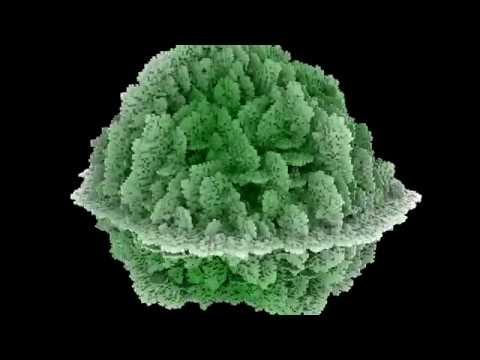

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('_W-n510Pca0', width=800, height=300)

## Samenvatting
------------

In dit topic hebben we het verschil tussen procedureel programmeren en
objectgericht programmeren uitgelegd. De waarden die we tot hiertoe
besproken hadden zijn eigenlijk objecten diep binnenin Python. De
operatoren die we gebruikten zijn eigenlijk oproepen van methoden die in
deze objecten leven, naast de attributen van die objecten. Het type van
zo'n object (bvb. `fraction`, `complex`, `box`, `array`, \...) hebben we
de klasse van het object genoemd. Door zélf nieuwe klassen te definiëren
kunnen we Python dus virtueel oneindig uitbreiden met nieuwe soorten
waarden. Dat is het onderwerp van volgend topic.

In dit topic hebben we m.b.v. `import` klassen geïmporteerd die door
derden werden geschreven. NumPy huisvest een belangrijke groep klassen
waarmee numerieke analyse op zeer hoog niveau bedreven kan worden.
Studenten die MatLab (dienen te) gebruiken dienen te weten dat NumPy
krachtiger is dan MatLab en bovendien gecombineerd kan worden met de
volledige kracht van Python. VPython huisvest een groep klassen waarmee
op zeer eenvoudige wijze 3-dimensionale scènes gebouwd kunnen worden
door de juiste constructoren op te roepen. Door de positie van de
objecten in een scène herhaaldelijk (m.b.v. een iteratie) te veranderen
krijgen we bovendien de illusie van bewegende beelden te maken met
Python. Dit kan dus uitstekend gebruikt worden om allerlei visuele
simulaties mee te bouwen.